[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BinhHV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BinhHV\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<Axes: xlabel='count', ylabel='Category'>

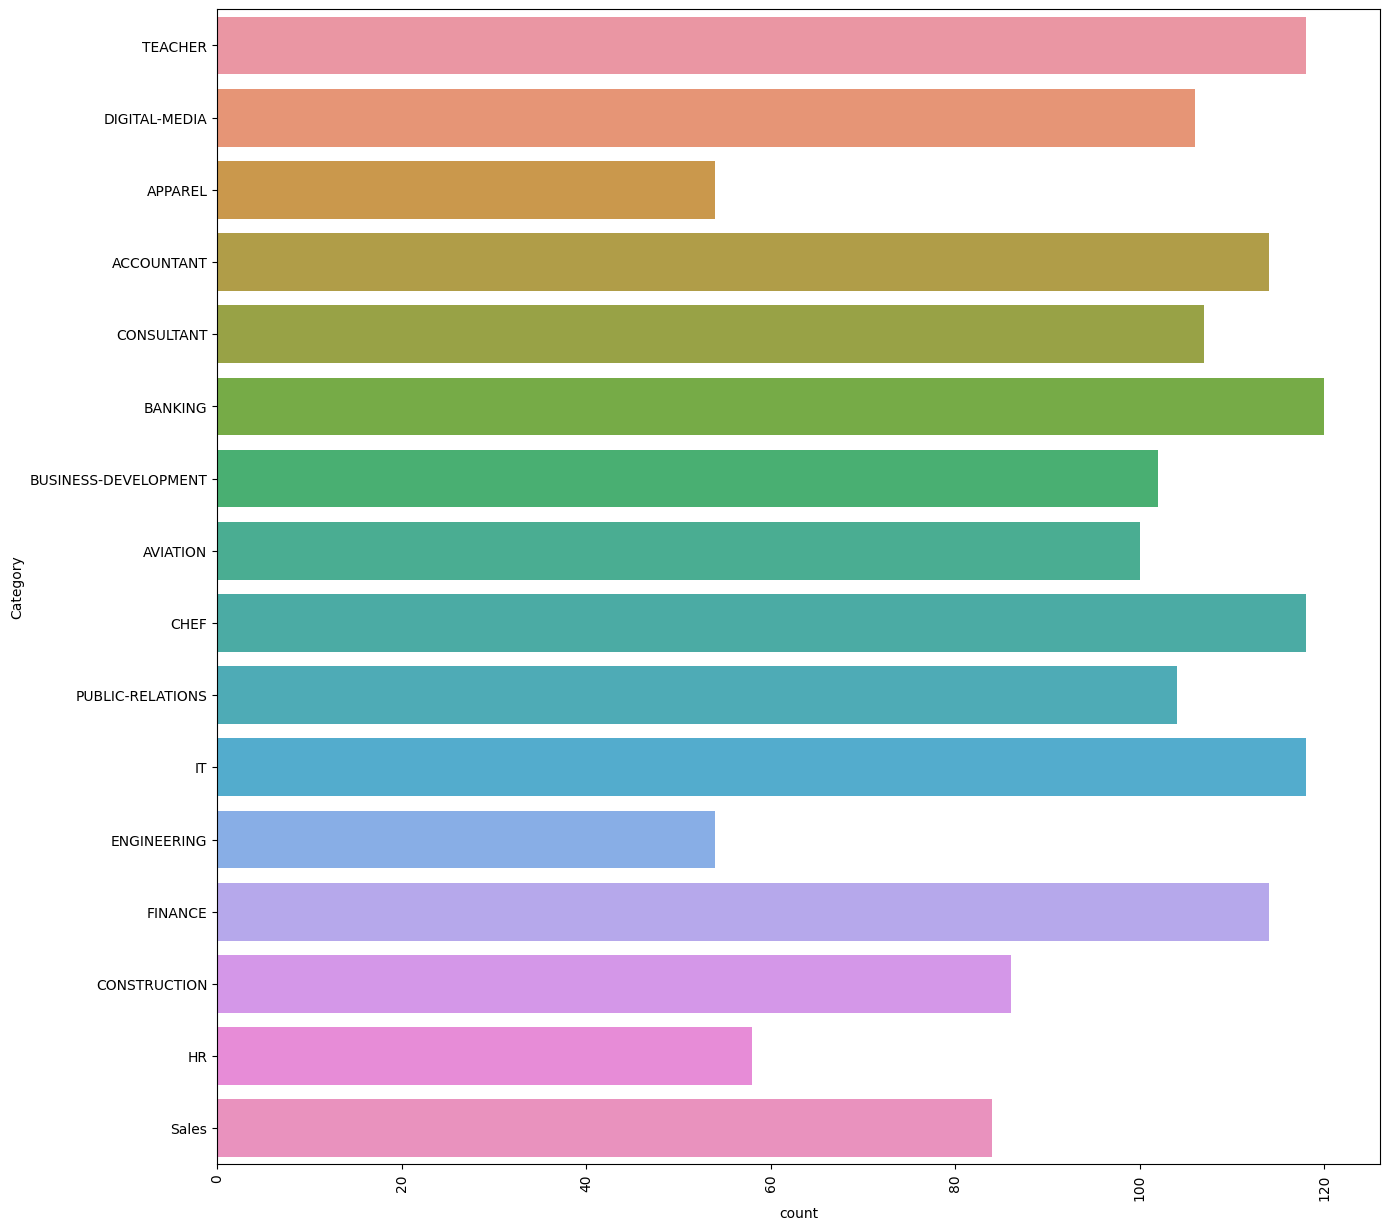

In [32]:
#%% Import libraries
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import pickle
import re
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
np.set_printoptions(precision=4)

nltk.download('stopwords')
nltk.download('punkt')

#%% Load data
data = pd.read_csv('./dataset/Data_v1/Final_data_v1.csv', encoding='utf-8')
data.head()
#%%Bar graph visualization
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=data)



In [33]:
data.head()


,Category,Resume,Skill
0,TEACHER,"Work History Teacher , 08/2014 to ...",TEACHER Professional Summary ...
1,TEACHER,I typically worked with general education stu...,Experience 08/2002 Teacher Compan...
2,TEACHER,written Experience Teacher August...,"TEACHER Skills charts, Excell..."
3,TEACHER,. Experience Teacher Jan 201...,TEACHER Summary Obtain a pos...
4,TEACHER,"Company Name Teacher City , State ...",TEACHER Skills E ducator: People...


In [34]:
print(data.columns)

Index(['Category', 'Resume', 'Skill'], dtype='object')


In [35]:
print(data['Resume'].values[1200])

kinh nghiệm làm việc tại các nhà hàng cao cấp với kiến ​​thức nền về Ẩm thực Pháp, Nhật Bản và Peru. Chuyên môn về tất cả các khía cạnh của quản lý nhà bếp, bao gồm Tỷ lệ phần trăm chi phí thực phẩm, lập ngân sách chi phí lao động, lập kế hoạch, phát triển thực đơn và lập kế hoạch chiến lược. Kinh nghiệm chuyên môn Tháng 5 năm 2005 đến tháng 11 năm 2011 Tên công ty Thành phố, Bang Đầu bếp Sushi Phụ trách hoạt động hàng ngày tại quán sushi, kiểm soát chất lượng, kiểm kê hàng tháng, phát triển thực đơn, lên lịch cho 10 nhân viên. Tháng 11 năm 2011 đến tháng 1 năm 2015 Tên công ty City , State Executive Sous Chef Phụ trách các hoạt động hàng ngày, phát triển thực đơn, Kiểm kê hàng tháng, lên lịch cho 50 người, Tháng 1 năm 2016 đến Tên công ty hiện tại City , State Corporate Chef Phụ trách các hoạt động hàng ngày của tất cả các nhà hàng, Phát triển thực đơn, Lập kế hoạch cho 90 người, Tỷ lệ phần trăm chi phí thực phẩm, Kiểm soát chi phí lao động, Tuyển dụng, Kiểm kê hàng tháng.


In [36]:
gist_file = open("./stopword.txt", "r")
try:
    content = gist_file.read()
    stopwords_set = content.split(",")
finally:
    gist_file.close()
stopwords_set = set(stopwords_set)

# %% Function to clean resume text
def clean_text(resume_text):
    try:
      resume_text = re.sub('http\S+\s*', ' ', resume_text) 
      resume_text = re.sub('RT|cc', ' ', resume_text) 
      resume_text = re.sub('#\S+', '', resume_text) 
      resume_text = re.sub('@\S+', '  ', resume_text) 
      resume_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resume_text) 
      resume_text = re.sub('\s+', ' ', resume_text) 
      resume_text = resume_text.lower()  
      resume_text_tokens = word_tokenize(resume_text) 
      filtered_text = [w for w in resume_text_tokens if not w in stopwords_set] 
      return ' '.join(filtered_text)
    except:
      return ''
    

# %% Print a sample original resume
print('--- Original resume ---')
#print(data['Resume'][0])
data['cleaned_resume'] = data.Resume.apply(lambda x: clean_text(x))
data['cleaned_skill'] = data.Skill.apply(lambda x: clean_text(x))

print('--- Cleaned resume ---')
#print(data['cleaned_resume'][0])


--- Original resume ---
--- Cleaned resume ---


In [37]:
print(data['Resume'].values[1000])
print(data['cleaned_resume'][1000])

Tư vấn kinh nghiệm Tháng 1 năm 2009 Tên công ty － Thành phố , Tiểu bang Nghiên cứu khả thi về lưu trữ CO2 và xử lý nước thải tại Hệ tầng Lawson ở Hạt Polk, Florida Phát triển phương trình bán phân tích để ước tính hiệu quả lưu trữ CO2 và thay đổi áp suất tại giếng khoan. Tiến hành mô phỏng dòng chảy chất lỏng và địa hóa học của CO2 và bơm nước thải đô thị. Đánh giá tác động địa cơ học của việc bơm chất lỏng vào hệ tầng Lawson. Kỹ sư hồ chứa Tháng 1 năm 2011 đến tháng 11 năm 2014 Tên công ty － Thành phố , Bang 02/2011— 09/2012 Điều tra viên Thử nghiệm CO2 EOR có thể trộn lẫn và không thể trộn lẫn Các lĩnh vực: Đồi Mumford (đá sa thạch Clore) và Sugar Creek (đá sa thạch Jackson). Nhà điều hành: Gallagher Drilling Inc, Evansville Indiana Làm việc chăm chỉ với các nhân viên kỹ thuật và khoa học địa chất để phát triển các mô hình phản ánh các đặc điểm địa chất và hồ chứa. Thu thập và tổng hợp dữ liệu đầu vào cho mô phỏng thành phần. Hiệu chỉnh các mô hình hồ chứa để quan sát và dữ liệu thực

In [38]:

# %%Get features and labels from data and shuffle
features1 = data['cleaned_resume'].values
features2 = data['cleaned_skill'].values

original_labels = data['Category'].values
labels = original_labels[:]
data_size = data.__len__()
for i in range(data_size):
  labels[i] = str(str(labels[i]).lower())
  labels[i] = labels[i].replace(" ", "") 
  labels[i] = labels[i].replace("-", "") 

features1,features2, labels = shuffle(features1,features2, labels)


# %% Split for train and test
train_split = 0.75
train_size = int(train_split * data_size)

train_features = [features1[:train_size],features2[:train_size]]
train_labels = labels[:train_size]

test_features = [features1[train_size:],features2[train_size:]]
test_labels = labels[train_size:]

# Print size of each split
print(train_labels.__len__())
print(test_labels.__len__())



1167
390


In [39]:

# %%Tokenize feature data and print word dictionary
vocab_size = 6000
oov_tok = '<OOV>'
feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
feature_tokenizer.fit_on_texts(features1)
feature_tokenizer.fit_on_texts(features2)
feature_index = feature_tokenizer.word_index
# Print example sequences from train and test datasets
train_feature_sequences = [feature_tokenizer.texts_to_sequences(train_features[0]),feature_tokenizer.texts_to_sequences(train_features[1])]
test_feature_sequences = [feature_tokenizer.texts_to_sequences(test_features[0]),feature_tokenizer.texts_to_sequences(test_features[1])]


In [40]:

# %% Tokenize label data and print label dictionary
from tensorflow.keras.layers import Input, Embedding, Concatenate, Flatten, Dense
import tensorflow as tf
label_tokenizer = Tokenizer(lower=True)
label_tokenizer.fit_on_texts(labels)
label_index = label_tokenizer.word_index
print(dict(list(label_index.items())))
# Print example label encodings from train and test datasets
train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)
test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)
num_epochs = 50
arrSesult = []
models = []
highestModel =[]
highestParam = []
highestAccuracy = 0
arrMaxlen = [800, 1000, 1200]
# para1
for j in range(arrMaxlen.__len__()):
    # %%Pad sequences for feature data
    max_length = arrMaxlen[j]
    trunc_type = 'post'
    pad_type = 'post'

    train_feature_padded = np.array([pad_sequences(train_feature_sequences[0], maxlen=max_length, padding=pad_type, truncating=trunc_type), pad_sequences(
        train_feature_sequences[1], maxlen=max_length, padding=pad_type, truncating=trunc_type)])
    test_feature_padded = np.array([pad_sequences(test_feature_sequences[0], maxlen=max_length, padding=pad_type, truncating=trunc_type), pad_sequences(
        test_feature_sequences[1], maxlen=max_length, padding=pad_type, truncating=trunc_type)])

    embedding_dim = 64
    units = np.unique(data['Category']).__len__() + 1
    # para2
    arrPercent = [
        [0.3, 0.7],
        [0.6, 0.4],
        [0.6, 0.4],
        [0.7, 0.3],]
    for i in range(arrPercent.__len__()):
        # First input
        arrSesult.append([arrMaxlen[j], arrPercent[i]])
        input1_weight = arrPercent[i][0]
        input2_weight = arrPercent[i][1]
        input1 = Input(shape=(max_length,), name='input1')
        x1 = Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                       input_length=max_length)(input1)*input1_weight

        # Second input
        input2 = Input(shape=(max_length,), name='input2')
        x2 = Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                       input_length=max_length)(input2)*input2_weight

        # Concatenate embeddings
        x = Concatenate()([Flatten()(x1), Flatten()(x2)])

        # Add more layers to the model
        x = Dense(64, activation='relu')(x)
        x = Dense(32, activation='relu')(x)
        output = Dense(units, activation='softmax')(x)

        # Create the model
        model = tf.keras.Model(inputs=[input1, input2], outputs=output)

        # %% # Compile the model and convert train/test data into NumPy arrays
        model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='adam', metrics=['accuracy'])
        # train_feature_padded = np.array(train_feature_padded)
        # test_feature_padded = np.array(test_feature_padded)
        train_label_sequences = np.array(train_label_sequences)
        test_label_sequences = np.array(test_label_sequences)

        # %%
        history = model.fit((train_feature_padded[0], train_feature_padded[1]), train_label_sequences, epochs=num_epochs, validation_data=(
            (test_feature_padded[0], test_feature_padded[1]), test_label_sequences), verbose=2)
        score = model.evaluate(
            (test_feature_padded[0], test_feature_padded[1]), test_label_sequences, verbose=1)
        if(score[1] > highestAccuracy):
            highestAccuracy = score[1]
            highestParam = [arrMaxlen[j], arrPercent[i]]
            highestModel = model

        # %%
        # model.save('models_P')
        models.append(model)
        # %% Draw accuracy model & loss model
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])

        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])

        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()


{'banking': 1, 'it': 2, 'teacher': 3, 'chef': 4, 'finance': 5, 'accountant': 6, 'consultant': 7, 'digitalmedia': 8, 'publicrelations': 9, 'businessdevelopment': 10, 'aviation': 11, 'construction': 12, 'sales': 13, 'hr': 14, 'apparel': 15, 'engineering': 16}
Epoch 1/50
37/37 - 6s - loss: 2.8274 - accuracy: 0.1045 - val_loss: 2.7755 - val_accuracy: 0.0949 - 6s/epoch - 152ms/step
Epoch 2/50
37/37 - 4s - loss: 2.6045 - accuracy: 0.2185 - val_loss: 2.6785 - val_accuracy: 0.1385 - 4s/epoch - 101ms/step
Epoch 3/50
37/37 - 4s - loss: 2.0466 - accuracy: 0.4310 - val_loss: 2.3476 - val_accuracy: 0.2692 - 4s/epoch - 98ms/step
Epoch 4/50
37/37 - 4s - loss: 0.9730 - accuracy: 0.8081 - val_loss: 1.8577 - val_accuracy: 0.4205 - 4s/epoch - 113ms/step
Epoch 5/50
37/37 - 4s - loss: 0.2039 - accuracy: 0.9880 - val_loss: 1.5573 - val_accuracy: 0.5282 - 4s/epoch - 118ms/step
Epoch 6/50
37/37 - 4s - loss: 0.0461 - accuracy: 0.9957 - val_loss: 1.4300 - val_accuracy: 0.5744 - 4s/epoch - 113ms/step
Epoch 7/50


In [24]:
#Find the highest result and save
count = 0
highestModel
index = 0
acc = 0
for j in range(arrMaxlen.__len__()):
    # %%Pad sequences for feature data
    max_length = arrMaxlen[j]
    trunc_type = 'post'
    pad_type = 'post'

    train_feature_padded = np.array([pad_sequences(train_feature_sequences[0], maxlen=max_length, padding=pad_type, truncating=trunc_type), pad_sequences(
        train_feature_sequences[1], maxlen=max_length, padding=pad_type, truncating=trunc_type)])
    test_feature_padded = np.array([pad_sequences(test_feature_sequences[0], maxlen=max_length, padding=pad_type, truncating=trunc_type), pad_sequences(
        test_feature_sequences[1], maxlen=max_length, padding=pad_type, truncating=trunc_type)])
    # para2
    for i in range(arrPercent.__len__()):
        score = models[count].evaluate((test_feature_padded[0],test_feature_padded[1]), test_label_sequences, verbose=1)
        print("Test Accuracy:",arrSesult[count], score[1])
        if score[1]> acc:
            acc = score[1]
            index = count
        
        count = count + 1
    



35/35 [==============================] - 1s 16ms/step - loss: 0.0266 - accuracy: 0.9955
Test Accuracy: [800, [0.3, 0.7]] 0.9954954981803894
35/35 [==============================] - 1s 14ms/step - loss: 0.0115 - accuracy: 0.9982
Test Accuracy: [800, [0.6, 0.4]] 0.9981982111930847
35/35 [==============================] - 1s 15ms/step - loss: 0.0164 - accuracy: 0.9937
Test Accuracy: [800, [0.6, 0.4]] 0.9936937093734741
35/35 [==============================] - 1s 14ms/step - loss: 0.0227 - accuracy: 0.9919
Test Accuracy: [800, [0.7, 0.3]] 0.9918919205665588
35/35 [==============================] - 1s 16ms/step - loss: 0.0372 - accuracy: 0.9901
Test Accuracy: [1000, [0.3, 0.7]] 0.9900900721549988
35/35 [==============================] - 1s 17ms/step - loss: 0.0211 - accuracy: 0.9937
Test Accuracy: [1000, [0.6, 0.4]] 0.9936937093734741
35/35 [==============================] - 1s 18ms/step - loss: 0.0204 - accuracy: 0.9946
Test Accuracy: [1000, [0.6, 0.4]] 0.9945945739746094
35/35 [==========

In [25]:
print(highestAccuracy)
print(highestParam)
models[index].save('models_P')

0.9981982111930847
[800, [0.6, 0.4]]


INFO:tensorflow:Assets written to: models_P\assets


INFO:tensorflow:Assets written to: models_P\assets


In [26]:
# %% Save feature tokenizer
with open('feature_tokenizer.pickle', 'wb') as handle:
    pickle.dump(feature_tokenizer, handle,
                protocol=pickle.HIGHEST_PROTOCOL)

# %% Save reverse dictionary of labels to encodings
label_to_encoding = dict(list(label_index.items()))

encoding_to_label = {}
for k, v in label_to_encoding.items():
    encoding_to_label[v] = k
print(encoding_to_label)
with open('dictionary.pickle', 'wb') as handle:
    pickle.dump(encoding_to_label, handle,
                protocol=pickle.HIGHEST_PROTOCOL)


{1: 'banking', 2: 'teacher', 3: 'it', 4: 'chef', 5: 'finance', 6: 'accountant', 7: 'consultant', 8: 'digitalmedia', 9: 'publicrelations', 10: 'businessdevelopment', 11: 'aviation', 12: 'construction', 13: 'engineering', 14: 'apparel', 15: 'testing', 16: 'bpo', 17: 'agriculture', 18: 'sales', 19: 'healthandfitness', 20: 'hr', 21: 'advocate', 22: 'automobile'}


In [ ]:
# %% Create padded sequence for example
input = """Work History      August 2010  -  Current    Teacher   |   Company Name   |   City  ,   State     Executed lesson plans and evaluated the effectiveness through assessment and reflection Created visual supports, using technology to enhance and to differentiate instruction Use the Go Math, Eureka, & Engage NY, IXL & Khan Academy resources to provide math instruction Lead inquiry-based student investigations for the FOSS Science Program using Next Generation Standards Work with the Common Core & Next Generation Standards to provide structured instruction Provide Smarter Balanced NWEA Test Preparation for Mathematics & Science Create instructional materials and strategies consistent with student learning and behavioral needs Utilize the Positive Behavior Support (PBS) Program to provide positive reinforcement as a preventive measure for disruptive and/or inappropriate behavior Collaborate with grade partners to provide consistent instruction, and to develop and implement grade-level goals Update a teacher infinite campus with homework, grades and events to extend parental and student communication.         August 2008  -  June 2010    6th Grade Teacher   |   Company Name   |   City  ,   State     Provide a balanced literacy program to fifth graders based on Shelton's curriculum goal of the whole, small, whole Reader's Workshop Model, in order to increase student growth in reading stamina and comprehension skills Use various strategies and procedures for small group instruction to increase student growth in vocabulary, fluency, and comprehension Utilize Technology across multiple content areas Teach students strategies for previewing books and choose a book that is "just-right" Provide Writing Instruction through the Writer's Workshop model Utilize the Houghton Mifflin Anthology to model various meta-cognitive reading strategies Supplement the curriculum with various non-fiction texts Utilize Literacy Work Stations during small group instruction time, such as an Independent Daily Reading Station, Word Study Station, and a CMT Strand Work Station Provide small group instruction based on analysis of weak CMT strands, as well as skill needs in the subjects of Reading, Writing, and Math Administer and analyze the Developmental Reading Assessment (DRA 2) Provide application lessons to improve students' Degrees of Reading Power skills on the Connecticut Mastery Tests Used the Everyday Mathematics Curriculum to provide math instruction Lead inquiry-based student investigations for the FOSS Science Program Provide Connecticut Mastery Test Preparation for Reading, Writing, Mathematics, and Science Create instructional materials and strategies consistent with student learning and behavioral needs Utilize the Positive Behavior Support (PBS) Program to provide positive reinforcement as a preventive measure for disruptive and/or inappropriate behavior.         September 2007  -  June 2008    Special Education Tutor   |   Company Name   |   City  ,   State     Modify math curriculum and created worksheets for a sixth grade student in accordance with IEP objectives Create accommodated quizzes, tests, lesson and study guides for sixth grade Social Studies curriculum Provide small group instruction for core content subjects in K-6 general education classrooms Provide assistance to general education teacher using the Inclusion Model for instruction Assess Kindergarten students using Shelton Public Schools Assessment Administer the Brigance Inventory of Basic Skills to special education students Administer CMT's to special education students Provide accommodations during sixth grade Writer's Workshop for a group of six students Planned and implemented an introduction to the 6th grade Science Embedded Task utilizing the Scientific Method Create visual supports using technology to enhance and to differentiate instruction Observe and assist with Everyday Mathematics, Wilson Reading, Houghton Mifflin, Scott Foresman Social Studies lesson, CMT Prep, and Literature Circles.         Education     2003   Diploma  :       Derby High School  ,   City  ,   State         2007   NCATE Endorsement, National Council for Accreditation of Teacher Education Connecticut Collaboration (Elementary Regular Education/Special Education) (013, 165 certifications)  :       Southern Connecticut State University  ,   City  ,   State         2010   Collaborative Endorsement (Elementary Regular/Special Education) (013, 165)  :       Southern Connecticut State University  ,   City  ,   State   NCATE Endorsement, National Council for Accreditation of Teacher Education Remedial Reading and Remedial Language Arts, Grades K-12 (102 Certification) GPA: 3.85 Magna Cum Laude, Outstanding Special Education Senior Award      May 2007   Bachelor of Arts  :   Psychology   Psychology         Passed Praxis II (Regular Education) *Passed Praxis II (Special Education) *Remedial Reading and Remedial Language Arts, Grades K-12 (102 Certification) *Passed Reading Test  :             Skills    Arts, Basic, book, content, Council, in K, Inspiration, instruction, Internet Browsers, Inventory, lesson plans, materials, Math, Mathematics, Excel, Microsoft Office, PowerPoint, Publisher, Microsoft Windows XP Professional, Word, Next, non-fiction, Speaking, Reading, Scientific, structured, Teacher, Writer      Additional Information      MEMBERSHIPS/HONORS: Academic Dean's List at Southern Connecticut State University  - (Fall 2003, Fall 2004, Fall 2005, Spring 2006, Fall 2006) Psi-Chi psychology national honor society Golden Key national honor society Kappa Delta Pi national honor society Most Outstanding Special Education Senior"""
resume_example = clean_text(input)
example_sequence = feature_tokenizer.texts_to_sequences([resume_example])
example_padded = pad_sequences(example_sequence, maxlen=max_length, padding=pad_type, truncating=trunc_type)
example_padded = np.array(example_padded)

input2 = """TEACHER         Professional Summary    An experienced human resource training professional with demonstrated success in developing, delivering and evaluating, corporate training programs, 2+ years of work with newly developed tools for rapid e-learning development. Special skills in online training for a variety of audiences. Recognized for alignment of training solutions with business goals, management of project and people, process improvement, needs analysis and training evaluation.      Core Qualifications          Microsoft Words  Outlook  Internet  PowerPoint  ADDIE MODEL  Microsoft Office  Adobe Photoshop  Audacity Sound Booth  Moodle  AdobeCS5  Captivate  Adobe Premier  Flash  Blackboard 9.1  PeopleSoft"""
resume_example2 = clean_text(input2)
example_sequence2 = feature_tokenizer.texts_to_sequences([resume_example2])
example_padded2 = pad_sequences(example_sequence2, maxlen=max_length, padding=pad_type, truncating=trunc_type)
example_padded2 = np.array(example_padded2)
#print(example_padded)
# Make a prediction
print((example_padded,example_padded2))
prediction = model.predict((example_padded,example_padded2))
# Verify that prediction has correct format
# print(prediction[0])
# print(np.sum(prediction[0])) 

# Indices of top 5 most probable solutions
indices = np.argpartition(prediction[0], -5)[-5:]
indices = indices[np.argsort(prediction[0][indices])]
indices = list(reversed(indices))
print(indices)

# Find maximum value in prediction and its index
#print(prediction[0])
# print(max(prediction[0])) 
# print(np.argmax(prediction[0])) 

# 
for index in indices:
    print(prediction[0][index]*100,"% ",encoding_to_label[index])

# %%